In [432]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import SimpleImputer



In [433]:
folder_path = './PassengerVehicle_Stats'
dfs = []
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in files:
    file_path = os.path.join(folder_path, file)
    df1 = pd.read_csv(file_path)
    dfs.append(df1)

# Combine all CSV files into one DataFrame
combine_df = pd.concat(dfs, ignore_index=True)
combine_df.to_csv('./vehicles_df.csv', index=False)

# Load the combined dataset
df = pd.read_csv('vehicles_df.csv')


In [434]:
print("Initial Dataset Info:")
df.info()

print("\nPreview of the dataset:")
print(df.head())
df = pd.read_csv('vehicles_df.csv')
df.isna().sum()


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66408 entries, 0 to 66407
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          66408 non-null  int64  
 1   Public Vehicle Number               66408 non-null  int64  
 2   Status                              66408 non-null  object 
 3   Vehicle Make                        58740 non-null  object 
 4   Vehicle Model                       58556 non-null  object 
 5   Vehicle Model Year                  58640 non-null  float64
 6   Vehicle Color                       58464 non-null  object 
 7   Vehicle Fuel Source                 66408 non-null  object 
 8   Wheelchair Accessible               66408 non-null  object 
 9   Company Name                        66408 non-null  object 
 10  Address                             59264 non-null  object 
 11  City               

Unnamed: 0                                0
Public Vehicle Number                     0
Status                                    0
Vehicle Make                           7668
Vehicle Model                          7852
Vehicle Model Year                     7768
Vehicle Color                          7944
Vehicle Fuel Source                       0
Wheelchair Accessible                     0
Company Name                              0
Address                                7144
City                                   7144
State                                  7144
ZIP Code                               7144
Taxi Affiliation                      37016
Taxi Medallion License Management     37124
Record ID                                 0
dtype: int64

In [435]:
print("\nNumber of Duplicate Records:", df.duplicated().sum())




Number of Duplicate Records: 49806


Shape after removing duplicates: (16602, 17)


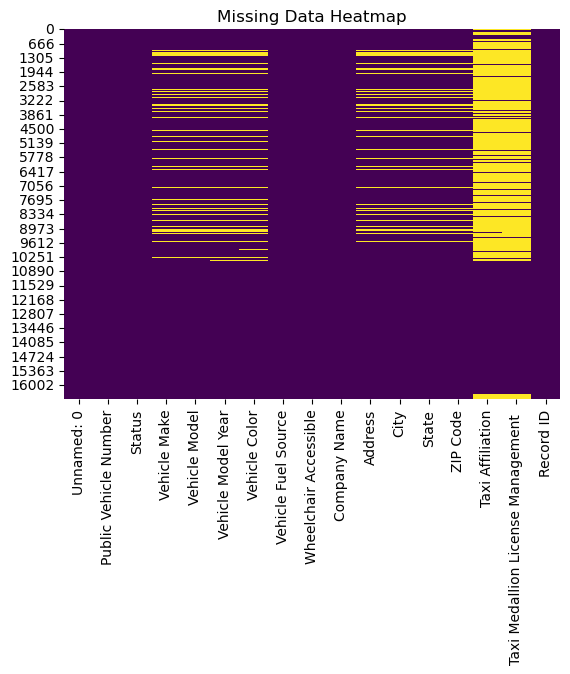

In [436]:
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [437]:
# Drop columns with >50% missing values (e.g., if they are non-critical)
missing_percentage = (df.isna().sum() / len(df)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped Columns: {columns_to_drop}")

Dropped Columns: Index(['Taxi Affiliation', 'Taxi Medallion License Management '], dtype='object')


In [438]:
# Impute missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median') # You can change strategy if needed
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])



In [439]:
# Impute missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median') # You can change strategy if needed
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])



In [440]:
# Impute missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])



In [441]:
df.dropna(subset=['Vehicle Make', 'Vehicle Model'], inplace=True)
print("\nMissing values after handling:")
print(df.isna().sum())



Missing values after handling:
Unnamed: 0               0
Public Vehicle Number    0
Status                   0
Vehicle Make             0
Vehicle Model            0
Vehicle Model Year       0
Vehicle Color            0
Vehicle Fuel Source      0
Wheelchair Accessible    0
Company Name             0
Address                  0
City                     0
State                    0
ZIP Code                 0
Record ID                0
dtype: int64
